# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "cod": 429,
    "message": "Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price"
}


In [57]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Cayenne
Processing Record 2 | Hermanus
Processing Record 3 | Ushuaia
Processing Record 4 | Inuvik
Processing Record 5 | Wajima
Processing Record 6 | Black River
Processing Record 7 | Fort Nelson
Processing Record 8 | Hobart
Processing Record 9 | Takoradze
Processing Record 10 | Khatanga
Processing Record 11 | Mataura
Processing Record 12 | Olafsvik
Processing Record 13 | Fortuna
Processing Record 14 | Vaini
City not found. Skipping...
Processing Record 15 | Saldanha
Processing Record 16 | Kampot
Processing Record 17 | Port Elizabeth
Processing Record 18 | Arraial do Cabo
Processing Record 19 | Wattegama
Processing Record 20 | Hilo
Processing Record 21 | Bethel
Processing Record 22 | Airai
Processing Record 23 | Mergen
Processing Record 24 | Mar del Plata
Processing Record 25 | Upernavik
Processing Record 26 | Beaverlodge
Processing Record 27 | Chokurdakh
Processing Record 28 | Rikitea
Processing Record 29 | 

City not found. Skipping...
Processing Record 229 | Buala
Processing Record 230 | São Paulo do Potengi
Processing Record 231 | Tasiilaq
Processing Record 232 | Kontagora
Processing Record 233 | Klaksvík
Processing Record 234 | Tshikapa
Processing Record 235 | Lavumisa
Processing Record 236 | Shādegān
Processing Record 237 | Redding
Processing Record 238 | Puteyets
Processing Record 239 | Belo Horizonte
Processing Record 240 | St. George's
Processing Record 241 | Kayes
Processing Record 242 | Sur
Processing Record 243 | Vila Franca do Campo
Processing Record 244 | Severodvinsk
Processing Record 245 | Tsagan Aman
Processing Record 246 | Benguela
City not found. Skipping...
Processing Record 247 | Ayan
Processing Record 248 | Maniitsoq
Processing Record 249 | Kukës
Processing Record 250 | Tilichiki
Processing Record 251 | Pevek
Processing Record 252 | Ploemeur
Processing Record 253 | Hervey Bay
Processing Record 254 | Ciudad del Maíz
Processing Record 255 | Bambanglipuro
Processing Record

Processing Record 462 | Alto Paraguai
Processing Record 463 | Talcahuano
Processing Record 464 | Morón
Processing Record 465 | Paraná
Processing Record 466 | Huarmey
Processing Record 467 | Lanuza
Processing Record 468 | Natchez
Processing Record 469 | Whitianga
Processing Record 470 | Luena
Processing Record 471 | São José da Coroa Grande
Processing Record 472 | Formosa
Processing Record 473 | Kimbe
Processing Record 474 | Umluj
Processing Record 475 | Chanderi
Processing Record 476 | Vostok
City not found. Skipping...
Processing Record 477 | Geraldton
Processing Record 478 | Siilinjärvi
Processing Record 479 | Bloemhof
Processing Record 480 | Nakambala
Processing Record 481 | Rangkasbitung
Processing Record 482 | Jaumave
Processing Record 483 | Saint-Cyr-sur-Loire
Processing Record 484 | Orlik
Processing Record 485 | Bandarbeyla
Processing Record 486 | Hokitika
Processing Record 487 | Labuhan
Processing Record 488 | Quatre Cocos
Processing Record 489 | Virginia Beach
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
weather_dict = {
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

df = pd.DataFrame(weather_dict)
df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cayenne,4.9333,-52.3333,78.10,90,75,3.44,GF,1638237982
1,Hermanus,-34.4187,19.2345,60.91,85,76,9.71,ZA,1638237983
2,Ushuaia,-54.8000,-68.3000,35.89,77,15,3.06,AR,1638237742
3,Inuvik,68.3499,-133.7218,-35.30,100,51,3.53,CA,1638237983
4,Wajima,37.4000,136.9000,55.51,53,66,10.67,JP,1638237983


In [21]:
df.to_csv("./Data/weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.834374,20.858061,52.153932,74.204668,61.578097,7.638456,1.638238e+09
std,33.689669,90.082470,28.228822,19.473034,40.198604,6.001257,8.695026e+01
min,-54.800000,-179.166700,-35.300000,12.000000,0.000000,0.000000,1.638237e+09
25%,-8.145000,-58.619800,32.220000,65.000000,16.000000,3.440000,1.638238e+09
50%,26.585100,23.600000,61.520000,77.000000,77.000000,6.130000,1.638238e+09
75%,50.100100,99.935700,75.220000,89.000000,100.000000,10.360000,1.638238e+09
max,78.218600,179.316700,99.950000,100.000000,100.000000,43.730000,1.638238e+09


In [25]:
#  Get the indices of cities that have humidity over 100%.
# no cities have humidity over 100% because max is 100

In [58]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df.dropna(inplace = False)

In [59]:
clean_city_data.head()


,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cayenne,4.9333,-52.3333,78.10,90,75,3.44,GF,1638237982
1,Hermanus,-34.4187,19.2345,60.91,85,76,9.71,ZA,1638237983
2,Ushuaia,-54.8000,-68.3000,35.89,77,15,3.06,AR,1638237742
3,Inuvik,68.3499,-133.7218,-35.30,100,51,3.53,CA,1638237983
4,Wajima,37.4000,136.9000,55.51,53,66,10.67,JP,1638237983


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

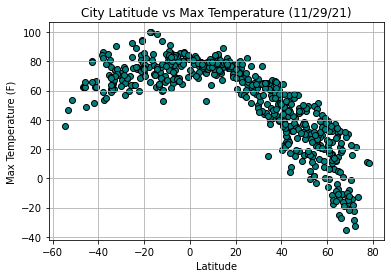

In [86]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temperature"], facecolors="teal", marker="o", edgecolor="black")
plt.title("City Latitude vs Max Temperature (11/29/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("./Data/1latvsmaxtemp.png")

This plot highlights a curve that indicates that maximum temperatures below the equator increase towards the equator and when moving north of the equator, temperatures decrease. There are more datapoints for cities north of the equator.  

## Latitude vs. Humidity Plot

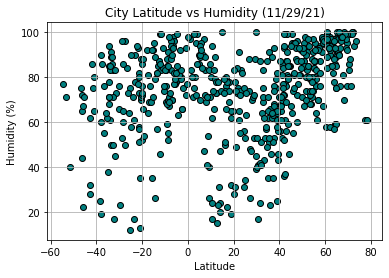

In [87]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], facecolors="teal", marker="o", edgecolor="black")
plt.title("City Latitude vs Humidity (11/29/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("./Data/2latvshumidity.png")

There seems to be two sets of upward trends, one above the equator and one below. Both trends have increasing humidity, but humidity increases in the southern hempisphere towards the equator but decreases in the northern hemisphere towards the equator. 

## Latitude vs. Cloudiness Plot

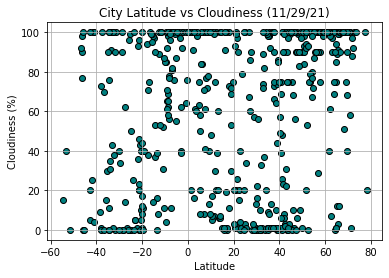

In [88]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], facecolors="teal", marker="o", edgecolor="black")
plt.title("City Latitude vs Cloudiness (11/29/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("./Data/3latvscloudiness.png")

There seems to be no relationship between latitude and cloudiness, meaning that cloudiness levels vary regardless of location. 

## Latitude vs. Wind Speed Plot

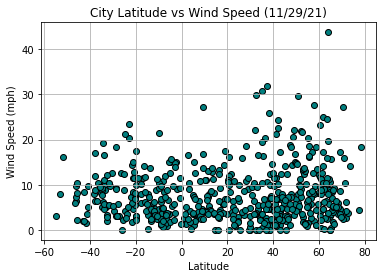

In [89]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], facecolors="teal", marker="o", edgecolor="black")
plt.title("City Latitude vs Wind Speed (11/29/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("./Data/4latvswindspeed.png")

There doesn't seem to be much of a trend between wind speed and latitude, where most wind speeds are quite low and some very northern cities are outliers in high wind speeds. 

## Linear Regression

In [43]:
#separate into northern and southern hempispheres
ndf = clean_city_data[clean_city_data['Latitude'] >= 0]
sdf = clean_city_data[clean_city_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

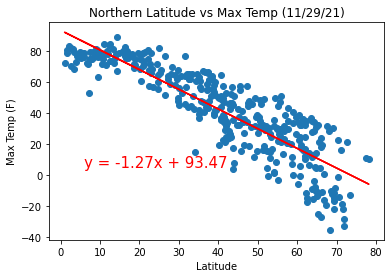

In [95]:
y_values = ndf['Max Temperature']
x_values = ndf['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.title('Northern Latitude vs Max Temp (11/29/21)')
plt.savefig("./Data/5ntemp.png");

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

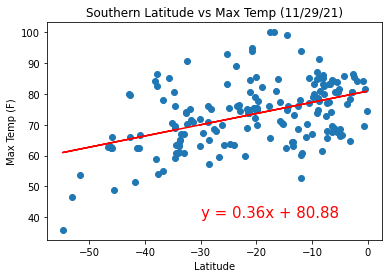

In [96]:
y_values = sdf['Max Temperature']
x_values = sdf['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.title('Southern Latitude vs Max Temp (11/29/21)')
plt.savefig("./Data/6stemp.png");

Northern and southern hemispheres have opposite trends in max temperatures. These opposite trends show that approaching the equator predicts increasing temperatures. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

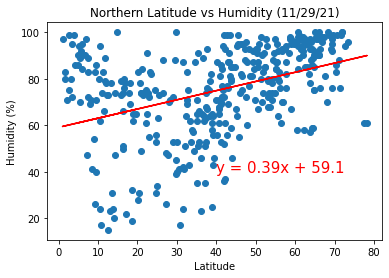

In [97]:
y_values = ndf['Humidity']
x_values = ndf['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Northern Latitude vs Humidity (11/29/21)')
plt.savefig("./Data/7nhumidity.png");

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

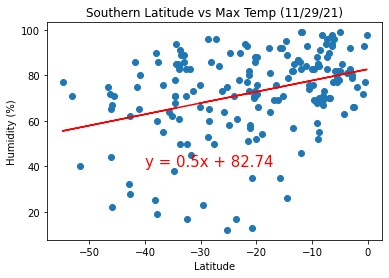

In [98]:
y_values = sdf['Humidity']
x_values = sdf['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Southern Latitude vs Max Temp (11/29/21)')
plt.savefig("./Data/8shumidity.png");

Both the northern and southern hemispheres have positive trends where decreasing southern latitudes and increasing northern latitudes predict higher humidity levels. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

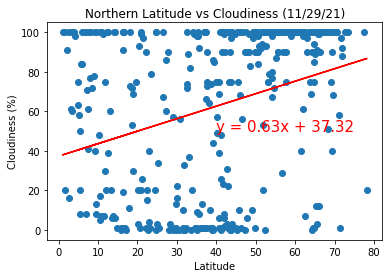

In [99]:
y_values = ndf['Cloudiness']
x_values = ndf['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Northern Latitude vs Cloudiness (11/29/21)')
plt.savefig("./Data/9ncloudiness.png");

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

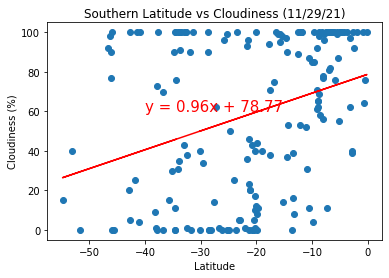

In [100]:
y_values = sdf['Cloudiness']
x_values = sdf['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Southern Latitude vs Cloudiness (11/29/21)')
plt.savefig("./Data/10scloudiness.png");

There are not strong trends between cloudiness and latitude, and although there is a line with a slope, it is not informative as many cloudiness percentages hit the maximum and minimum. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

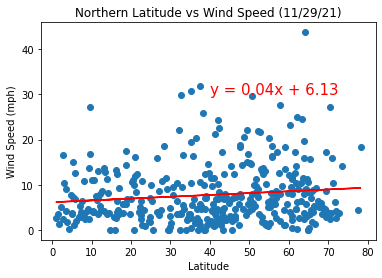

In [101]:
y_values = ndf['Wind Speed']
x_values = ndf['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Northern Latitude vs Wind Speed (11/29/21)')
plt.savefig("./Data/11nwind.png");

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

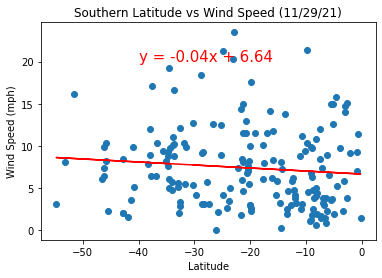

In [102]:
y_values = sdf['Wind Speed']
x_values = sdf['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Southern Latitude vs Wind Speed (11/29/21)')
plt.savefig("./Data/12swind.png");

There doesn't appear to be much of a predictive value of latitude for wind speed, as both slopes are close to horizontal. 